In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
import os
import glob
import sklearn
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preprocessing
import time
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
%matplotlib inline

In [7]:
# choose the directory and necessary files
directory = '/Volumes/Samsung_T5/project files/lump_project/data/data_collection/W_all_data/'
os.chdir(directory)
csv_files = glob.glob('*raw*8.csv')
csv_files

['df_train_raw_8.csv', 'df_dev_raw_8.csv']

In [ ]:
pd.read_csv(csv_files[1], header = None)

In [109]:
# load the data
all_subject_pressure_data_with_0_1 = pd.read_csv(csv_files[1], header = None)
all_subject_pressure_data_with_0_1 = all_subject_pressure_data_with_0_1.transpose()
print(np.shape(all_subject_pressure_data_with_0_1))

all_subject_pressure_data_without_0_1 = pd.read_csv(csv_files[0], header = None)
all_subject_pressure_data_without_0_1 = all_subject_pressure_data_without_0_1.transpose()
print(np.shape(all_subject_pressure_data_without_0_1))

df = pd.concat([all_subject_pressure_data_without_0_1, all_subject_pressure_data_with_0_1 ])

df = df.reset_index(drop = True)
print(np.shape(df))
# load the labels
directory = '/Volumes/Samsung_T5/project files/lump_project/data/data_collection/W_all_data/'
os.chdir(directory)
lump_variation_label_with = pd.read_csv('lump_variation_label_with.csv', header = None)
binary_labels = pd.read_csv('binary_labels.csv', header = None)
binary_labels = pd.DataFrame(binary_labels.values[1:,:])
labels = pd.read_csv('labels.csv', header = None)

(2880, 240)
(2880, 240)
(5760, 240)


In [110]:
# for the data with lump only to see if they are separable within the types
time_start = time.time()
tsne_with = TSNE(random_state = 0)
tsne_results_with = tsne_with.fit_transform(all_subject_pressure_data_with_0_1.values)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

# fro the without + with
time_start = time.time()
tsne = TSNE(random_state = 0)
tsne_results = tsne.fit_transform(df.values)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 9.41198468208313 seconds
t-SNE done! Time elapsed: 17.300774812698364 seconds


In [111]:
##add labels
all_subject_pressure_data_with_0_1['label'] = labels
df['label'] = binary_labels

[[0.86   0.3712 0.34  ]
 [0.34   0.8288 0.86  ]]
[[0.86   0.3712 0.34  ]
 [0.86   0.6832 0.34  ]
 [0.7248 0.86   0.34  ]
 [0.4128 0.86   0.34  ]
 [0.34   0.86   0.5792]
 [0.34   0.8288 0.86  ]
 [0.34   0.5168 0.86  ]
 [0.4752 0.34   0.86  ]
 [0.7872 0.34   0.86  ]
 [0.86   0.34   0.6208]]


/var/folders/70/bcchjtpd7dv_ds39f4ythgrh0000gn/T/ipykernel_53618/3918933222.py:11: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sc = ax.scatter(x[:,0], x[:,1],  c = palette[colors.astype(np.int)], cmap=plt.cm.get_cmap('Paired'))


(<Figure size 576x576 with 1 Axes>,
 <AxesSubplot:>,
 [Text(26.265762, 11.7563, '0'),
  Text(33.726837, 14.999084, '1'),
  Text(29.086065, -6.1130013, '2'),
  Text(17.463142, 3.4427567, '3'),
  Text(14.8124275, 1.7152715, '4'),
  Text(3.3890655, 5.011135, '5'),
  Text(-18.583616, -8.538128, '6'),
  Text(-25.456379, -6.0183716, '7'),
  Text(-22.095127, -4.5813627, '8'),
  Text(-18.37383, -10.888645, '9')])

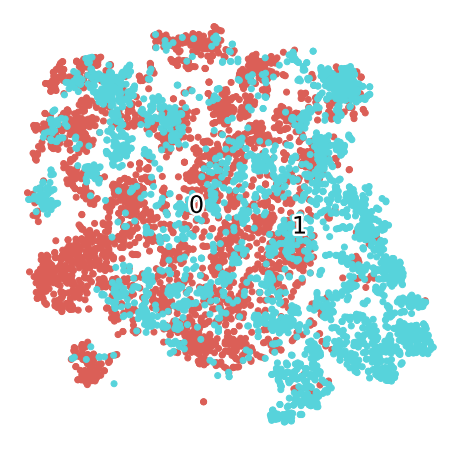

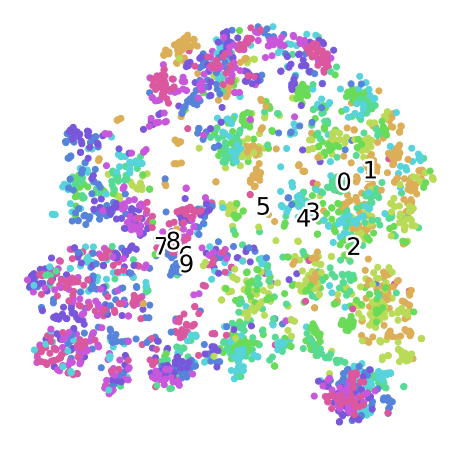

In [112]:
# plot  
def plot_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))
    print(palette)
    
    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1],  c = palette[colors.astype(np.int)], cmap=plt.cm.get_cmap('Paired'))
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')
# add the labels for each digit corresponding to the label
    txts = []
    for i in range(num_classes):
        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)
    return f, ax, sc, txts

plot_scatter(tsne_results, df['label'])

plot_scatter(tsne_results_with, all_subject_pressure_data_with_0_1['label'])
#

In [1]:
labels

NameError: name 'labels' is not defined

In [ ]:
all_subject_pressure_data_with_0_1

In [ ]:
# fro the without + with
time_start = time.time()
tsne_with = TSNE(random_state = 0)
tsne_results_with = tsne_with.fit_transform(all_subject_pressure_data_with_0_1.values)
print ('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


In [ ]:
all_subject_pressure_data_with_0_1['label'] = labels
df['label'] = binary_labels

In [ ]:


plot_scatter(tsne_results_with, all_subject_pressure_data_with_0_1['label'])
#